#<center>  Articence Data Exercise <center>
 <center>By Catherine Hsu<center>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

In [73]:
product_info_df = pd.read_csv('/content/drive/My Drive/DataScienceEvaluation.csv')
product_info_df = product_info_df.dropna()

**Products and Profitability**

Every company has profitable and unpopular products. To evaluate the success of products in the marketplace, I solely looked at their profitability. I did three forms of analysis. 

First, I did a general analysis of the products by grouping them according to item type and taking the average total profit. 

In [74]:
general_df = product_info_df.groupby(['Item Type']).mean()
general_df = general_df[['Total Profit']]
general_df

,Total Profit
Item Type,
Baby Food,471801.294958
Beverages,78157.155945
Cereal,443282.151263
Clothes,371222.569516
Cosmetics,859814.927486
Fruits,11987.605264
Household,830261.766776
Meat,283279.282899
Office Supplies,631973.859501


Text(0, 0.5, 'Profit ($)')

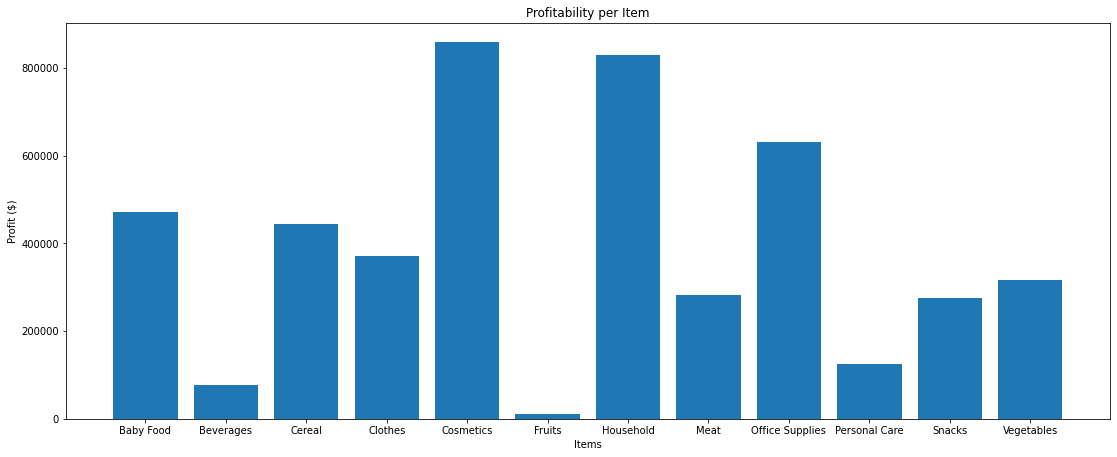

In [75]:
fig = plt.figure()
fig.set_size_inches(14.5, 5.5)
ax = fig.add_axes([0,0,1,1])
items = general_df.index
profitability = general_df['Total Profit']
ax.bar(items, profitability)
plt.title('Profitability per Item')
plt.xlabel('Items')
plt.ylabel('Profit ($)')

From the bar chart, the three most popular items are cosmetics, household, and office supplies. The three least popular items are personal care, beverages, and fruits.

To evaluate each of the six items with more granularity, I evaluated their profitability in every region. I  grouped them by region of origin and took their average total profit.

Text(0, 0.5, 'Profit ($)')

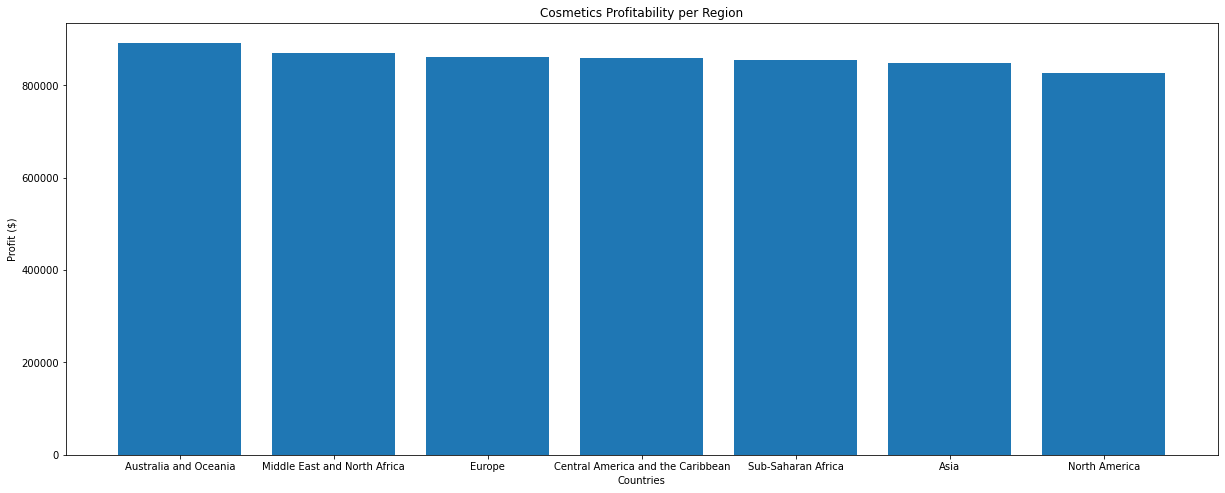

In [76]:
cosmetics = product_info_df[product_info_df['Item Type']=='Cosmetics']
cosmetics = cosmetics.groupby(['Region']).mean()[['Total Profit']].sort_values('Total Profit', ascending = False)

fig = plt.figure()
fig.set_size_inches(16, 6)
ax = fig.add_axes([0,0,1,1])
countries = cosmetics.index
profitability = cosmetics['Total Profit']
ax.bar(countries, profitability)
plt.title('Cosmetics Profitability per Region')
plt.xlabel('Countries')
plt.ylabel('Profit ($)')

Text(0, 0.5, 'Profit ($)')

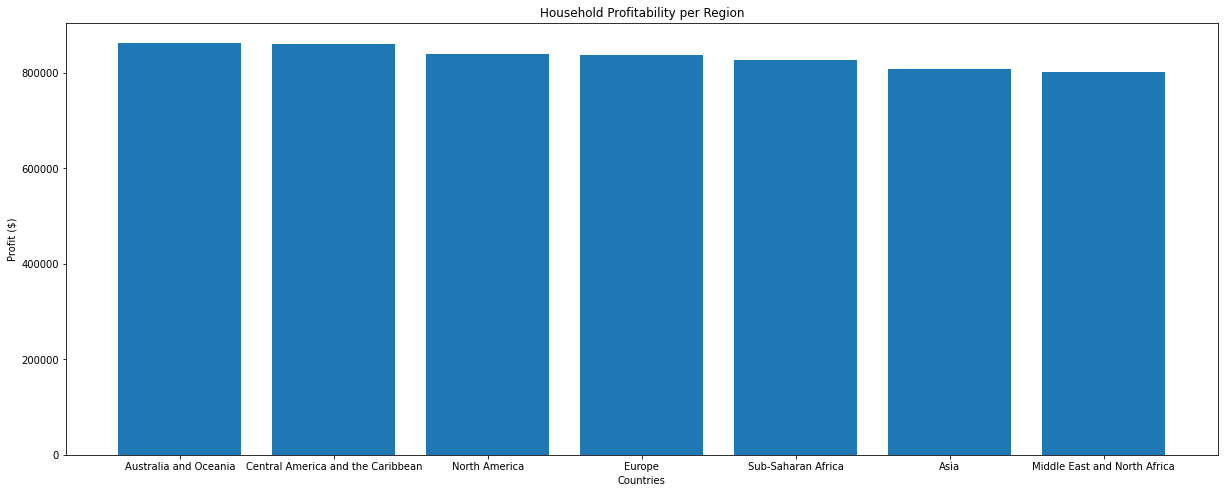

In [77]:
household = product_info_df[product_info_df['Item Type']=='Household']
household = household.groupby(['Region']).mean()[['Total Profit']].sort_values('Total Profit', ascending = False)

fig = plt.figure()
fig.set_size_inches(16, 6)
ax = fig.add_axes([0,0,1,1])
countries = household.index
profitability = household['Total Profit']
ax.bar(countries, profitability)
plt.title('Household Profitability per Region')
plt.xlabel('Countries')
plt.ylabel('Profit ($)')

Text(0, 0.5, 'Profit ($)')

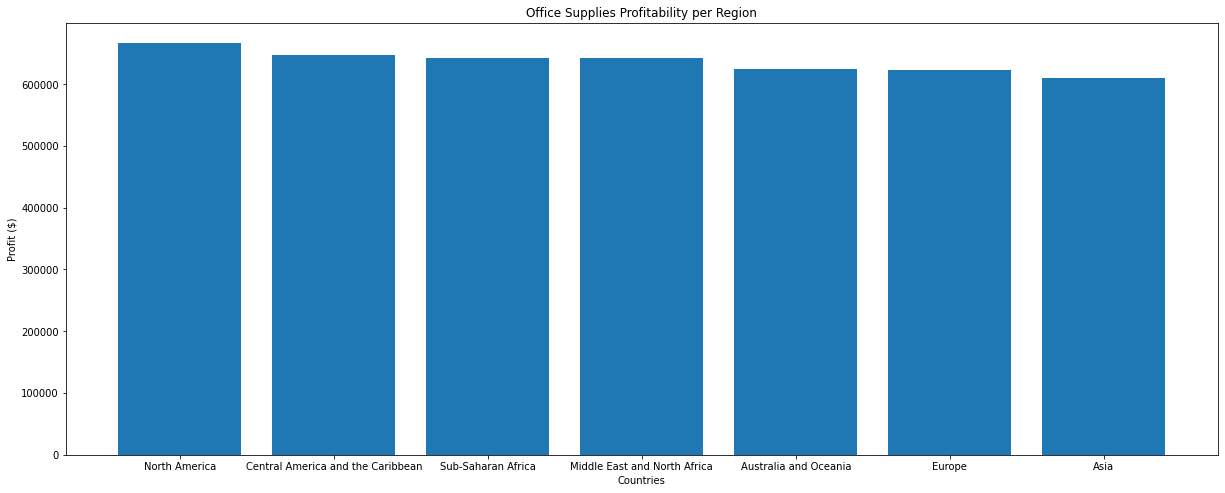

In [78]:
osupplies = product_info_df[product_info_df['Item Type']=='Office Supplies']
osupplies = osupplies.groupby(['Region']).mean()[['Total Profit']].sort_values('Total Profit', ascending = False)

fig = plt.figure()
fig.set_size_inches(16, 6)
ax = fig.add_axes([0,0,1,1])
countries = osupplies.index
profitability = osupplies['Total Profit']
ax.bar(countries, profitability)
plt.title('Office Supplies Profitability per Region')
plt.xlabel('Countries')
plt.ylabel('Profit ($)')

Text(0, 0.5, 'Profit ($)')

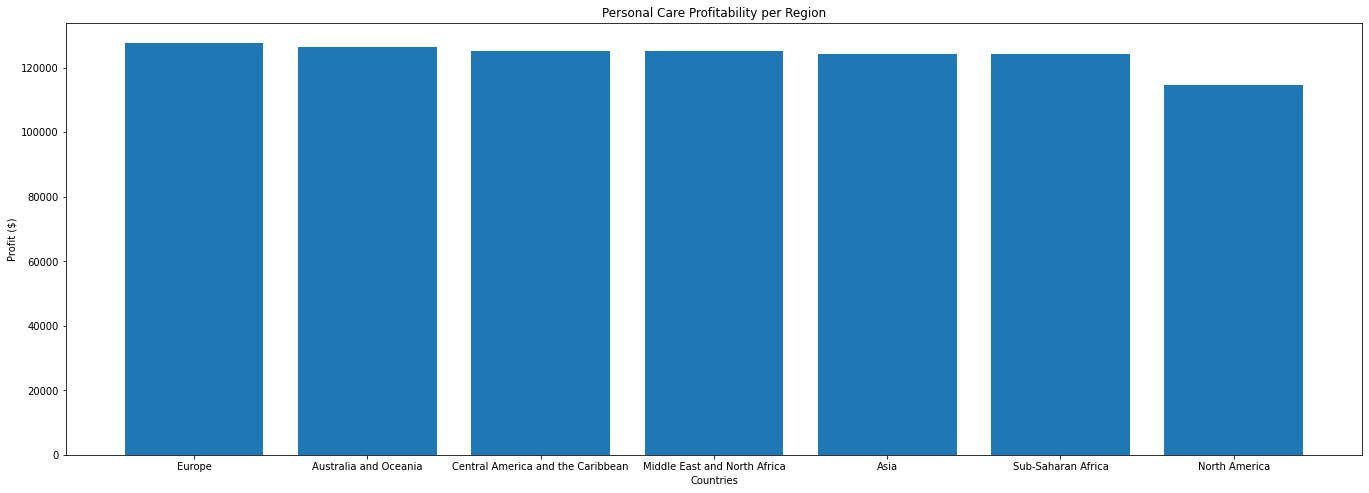

In [79]:
pcare = product_info_df[product_info_df['Item Type']=='Personal Care']
pcare = pcare.groupby(['Region']).mean()[['Total Profit']].sort_values('Total Profit', ascending = False)

fig = plt.figure()
fig.set_size_inches(18, 6)
ax = fig.add_axes([0,0,1,1])
countries = pcare.index
profitability = pcare['Total Profit']
ax.bar(countries, profitability)
plt.title('Personal Care Profitability per Region')
plt.xlabel('Countries')
plt.ylabel('Profit ($)')

Text(0, 0.5, 'Profit ($)')

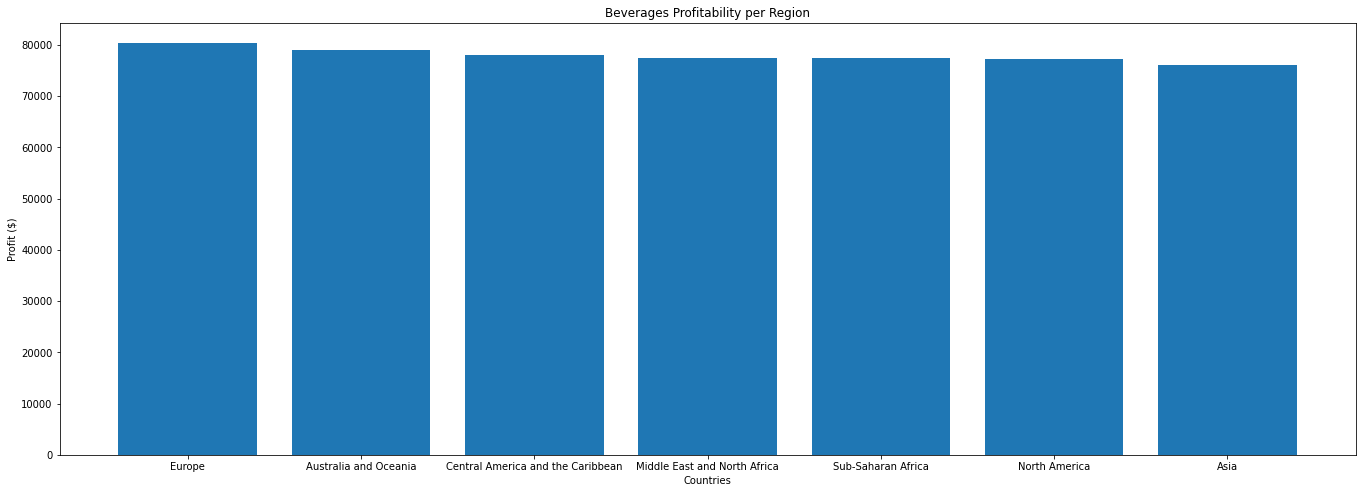

In [80]:
beverages = product_info_df[product_info_df['Item Type']=='Beverages']
beverages = beverages.groupby(['Region']).mean()[['Total Profit']].sort_values('Total Profit', ascending = False)

fig = plt.figure()
fig.set_size_inches(18, 6)
ax = fig.add_axes([0,0,1,1])
countries = beverages.index
profitability = beverages['Total Profit']
ax.bar(countries, profitability)
plt.title('Beverages Profitability per Region')
plt.xlabel('Countries')
plt.ylabel('Profit ($)')

Text(0, 0.5, 'Profit ($)')

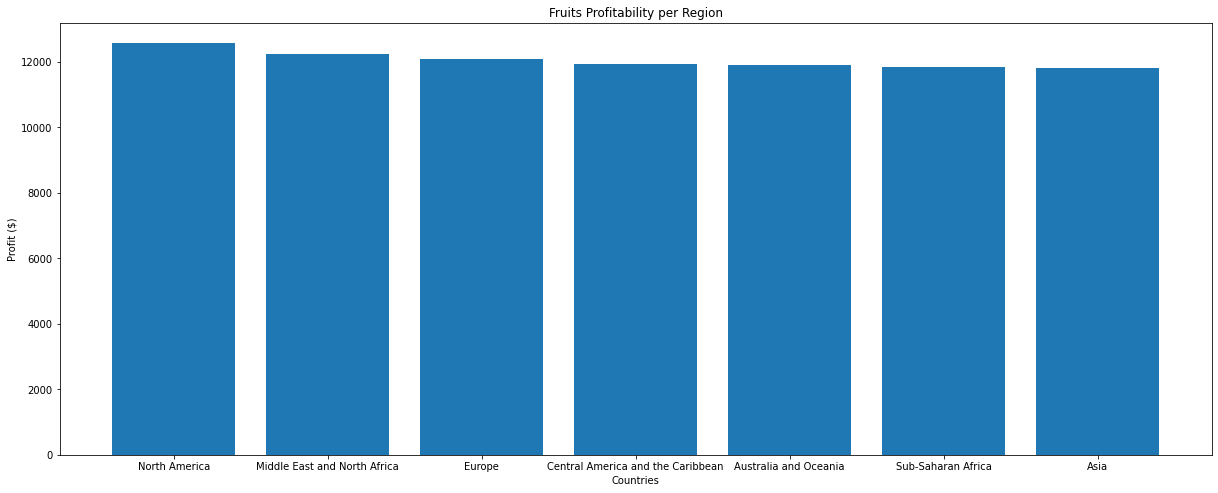

In [81]:
fruits = product_info_df[product_info_df['Item Type']=='Fruits']
fruits = fruits.groupby(['Region']).mean()[['Total Profit']].sort_values('Total Profit', ascending = False)

fig = plt.figure()
fig.set_size_inches(16, 6)
ax = fig.add_axes([0,0,1,1])
countries = fruits.index
profitability = fruits['Total Profit']
ax.bar(countries, profitability)
plt.title('Fruits Profitability per Region')
plt.xlabel('Countries')
plt.ylabel('Profit ($)')

Moving forward, we should consider dropping products in regions with low profitablity. At a large scale, items in personal care, beverages, and fruits are the least profitable. But, when we observe at a more granular scale, we see that Asia and Sub-Saharan Africa are consistently the bottom three profitable regions in personal care, beverages, and fruits. Due to the low profits in those regions, we should consider dropping products in personal care, beverages, and fruits in Asia and Sub-Saharan Africa.

Conversely, items in cosmetics, household, and office supplies are very profitable. Customers in Australia & Oceania, Central America & the Caribbean, and North America are huge consumers of these products. We know that there is a great market for cosmetics, household, and office supplies and need to redirect our marketing strategy to regions which have the potential to be very profitable for these products. On average, these countries are the top five profitable countries in cosmetics, household, and office supplies: Middle East & North Africa and Sub-Saharan Africa. 

**Easiest Products to Sell**

Then, I evaluated the easiest selling products. To do so, I created a column called Turnaround (Days) that is the difference between the ship date and order date. 

In [82]:
days_elapsed = []
for ship_date, order_date in zip(product_info_df['Ship Date'], product_info_df['Order Date']):
  ship_obj =datetime.datetime.strptime(ship_date,"%m/%d/%y")
  ship_reformatted = datetime.datetime(ship_obj.year, ship_obj.month, ship_obj.day)

  order_obj=datetime.datetime.strptime(order_date,"%m/%d/%y")
  order_reformatted = datetime.datetime(order_obj.year, order_obj.month, order_obj.day)

  days_elapsed.append((ship_reformatted - order_reformatted).days)

In [83]:
product_info_df['Turnaround (Days)'] = days_elapsed
days_region_type = product_info_df[['Region', 'Item Type', 'Turnaround (Days)']]
days_region_type.head()

,Region,Item Type,Turnaround (Days)
0,Sub-Saharan Africa,Snacks,3
1,Sub-Saharan Africa,Snacks,25
2,Central America and the Caribbean,Clothes,20
3,Europe,Office Supplies,18
4,Europe,Cosmetics,48


Thereafter, I calculated the average turnaround time for each item type and region. Overall, I gathered that cosmetics, snacks, and meat had the quickest turnaround time, while fruits, personal care, and office supplies had the slowest turnaround time. 

In [84]:
days_region_type.groupby(['Item Type']).mean().sort_values('Turnaround (Days)', ascending = True)

,Turnaround (Days)
Item Type,
Cosmetics,24.667757
Snacks,24.746577
Meat,24.799778
Beverages,24.803422
Cereal,24.915576
Baby Food,25.030127
Vegetables,25.120235
Household,25.200513
Clothes,25.200591


In [88]:
days_region_type.groupby(['Region']).mean().sort_values('Turnaround (Days)', ascending = True)

,Turnaround (Days)
Region,
Australia and Oceania,24.796349
Sub-Saharan Africa,24.867922
Central America and the Caribbean,24.984983
Middle East and North Africa,25.076732
Europe,25.106199
Asia,25.282504
North America,25.343441


Then, I was interested to see if my previous analysis was true when looking at a more granular scale. I grouped the dataframe by region and item type.

In [85]:
region_type_turnaround = days_region_type.groupby(['Region', 'Item Type']).mean().sort_values('Turnaround (Days)', ascending = True)

In [86]:
region_type_turnaround.head(10)

Turnaround (Days)
Region                            Item Type                         
Australia and Oceania             Fruits                   22.933180
North America                     Cereal                   22.946903
Central America and the Caribbean Cosmetics                23.968284
Australia and Oceania             Cosmetics                24.000000
Middle East and North Africa      Office Supplies          24.091822
Central America and the Caribbean Meat                     24.145907
Sub-Saharan Africa                Meat                     24.280367
                                  Snacks                   24.313658
Middle East and North Africa      Beverages                24.358118
Central America and the Caribbean Baby Food                24.408696

What is interesting is that some regions have quicker turnaround times in item types than previously thought. For example, fruits was the one of the slowest items in terms of turnaround time, but here in the table above, fruits in Australia and Oceania have the quickest turnaround time, 22.933 days. 


Though, overall, my initial findings remained true. Both tables produce similar results. Cosmetics and meat are still two of the three most common  item types with the quickest average turnaround. Furthermore, in terms of the regions, Central America & the Caribbean and Sub-Saharan Africa still have the quickest turnaround time.